Irsath Azeez<br>
Summer Research Columbia/Amazon SURE Program<br>
Mentor: Philippe Chlenski<br>
Professor : Itsik Pe'er<br>
<u>Research : Data Mining and Analysis in computational Biology


<h style="color:green; font-size:20px"> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <u><b>Metagenomic-ASV sequence and Analysis</b></u></h>

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import pandas as pd
import xgboost as xg
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import ASV_ as asv   # custome made interface
import h5py
# from ts2ml.core import add_missing_slots
# from ts2ml.core import transform_ts_data_into_features_and_target
# import hdf5plugin
%matplotlib inline

<p style=color:DodgerBlue>Anndata:<br>
Isaac Virshup, Sergei Rybakov, Fabian J. Theis, Philipp Angerer, F. Alexander Wolf<br>
bioRxiv 2021 Dec 19. doi: 10.1101/2021.12.16.473007.<br><br>

<p style=color:DodgerBlue>scverse:<br>
Isaac Virshup, Danila Bredikhin, Lukas Heumos, Giovanni Palla, Gregor Sturm, Adam Gayoso, Ilia Kats, Mikaela<br> Koutrouli, Scverse Community, Bonnie Berger, Dana Pe’er, Aviv Regev, Sarah A. Teichmann, Francesca Finotello, F.<br> Alexander Wolf, Nir Yosef, Oliver Stegle & Fabian J. Theis<br>
Nat Biotechnol. 2023 Apr 10. doi: 10.1038/s41587-023-01733-8.<br></style></p>

<p style=color:DodgerBlue>Scanpy:<br>
FA Wolf, Philipp Angerer, F J Theis<br>
Genome biology 19, 1-5<br><br>


In [2]:
print(ad.__version__)       # anndata version

0.9.1


<b><u>Datasets

In [3]:
adata = ad.read_csv('/Users/irsathazeez/Desktop/project/counts.tsv', delimiter='\t')
mdata = pd.read_csv('/Users/irsathazeez/Desktop/project/metadata.tsv', delimiter='\t')
pdata = pd.read_csv('/Users/irsathazeez/Desktop/project/perturbations.tsv', delimiter='\t')
qPCR = pd.read_csv('/Users/irsathazeez/Desktop/project/qpcr.tsv', delimiter='\t')
rdp_species = pd.read_csv('/Users/irsathazeez/Desktop/project/rdp_species.tsv', delimiter='\t')
silva_species = pd.read_csv('/Users/irsathazeez/Desktop/project/silva_species.tsv', delimiter='\t')

In [4]:
adata.shape

(1088, 339)

In [5]:
adata

AnnData object with n_obs × n_vars = 1088 × 339

In [6]:
adata = adata.T

In [7]:
raw_data = adata.copy()

In [8]:
adata.shape

(339, 1088)

In [9]:
adata.X

array([[0.0000e+00, 4.3000e+01, 5.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0000e+00, 3.2000e+01, 1.0700e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0000e+00, 6.5000e+01, 9.4600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.1040e+03, 1.5783e+04, 2.1064e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.6260e+03, 1.8266e+04, 2.6375e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.3410e+03, 1.2650e+04, 2.2036e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], dtype=float32)

In [10]:
adata.var

""
ASV_1
ASV_2
ASV_3
ASV_4
ASV_5
...
ASV_1084
ASV_1085
ASV_1086
ASV_1087


In [11]:
adata.obs

""
1-D0AM
1-D0PM
1-D1AM
1-D1PM
1-D29AM
...
M2-D9-1B
M2-D9-2A
M2-D9-2B
M2-D9-3A


In [12]:
adata.obs_names_make_unique()
adata.var_names_make_unique()

In [13]:
adata.obs = mdata       # adding the meta data to anndata object



In [14]:
adata.obs = adata.obs.set_index('sampleID')

In [15]:
adata.X

array([[0.0000e+00, 4.3000e+01, 5.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0000e+00, 3.2000e+01, 1.0700e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0000e+00, 6.5000e+01, 9.4600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.1040e+03, 1.5783e+04, 2.1064e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.6260e+03, 1.8266e+04, 2.6375e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.3410e+03, 1.2650e+04, 2.2036e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], dtype=float32)

In [16]:
adata.obs

,subject,time
sampleID,,
1-D0AM,1,0.0
1-D0PM,1,0.5
1-D1AM,1,1.0
1-D1PM,1,1.5
1-D29AM,1,29.0
...,...,...
M2-D9-1B,M2-D9,1.0
M2-D9-2A,M2-D9,2.0
M2-D9-2B,M2-D9,3.0


In [17]:
adata.uns.obs = pdata       # adding the pertubation unstructed meta data to the anndata unstructed spot

In [18]:
adata.uns.obs 

,name,start,end,subject
0,High Fat Diet,21.5,28.5,2
1,High Fat Diet,21.5,28.5,3
2,High Fat Diet,21.5,28.5,4
3,High Fat Diet,21.5,28.5,5
4,Vancomycin,35.5,42.5,2
5,Vancomycin,35.5,42.5,3
6,Vancomycin,35.5,42.5,4
7,Vancomycin,35.5,42.5,5
8,Vancomycin,35.5,42.5,6
9,Vancomycin,35.5,42.5,7


In [19]:
pertubation = []

<u>Finding the pertubation from each sample using the unstructed pertubation meta data 

In [20]:
for i in range(adata.obs.shape[0]):
    time = adata.obs['time'][i]
    flag = False
    for j in range(adata.uns.obs.shape[0]):
        if (time >= adata.uns.obs['start'][j] and time <= adata.uns.obs['end'][j]) and (adata.obs['subject'][i] == str(adata.uns.obs['subject'][j])):
            flag = True
            k = j
            break
    if flag:
        pertubation.append(adata.uns.obs['name'][k])
    else:
        pertubation.append('None') 



In [21]:
pertubation

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'High Fat Diet',
 'High Fat Diet',
 'High Fat Diet',
 'High Fat Diet',
 'High Fat Diet',
 'High Fat Diet',
 'High Fat Diet',
 'High Fat Diet',
 'High Fat Diet',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Vancomycin',
 'Vancomycin',
 'Vancomycin',
 'Vancomycin',
 'Vancomycin',
 'Vancomycin',
 'Vancomycin',
 'None',
 'None',
 'Vancomycin',
 'Vancomycin',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Gentamicin',
 'Gentamicin',
 'Gentamicin',
 'Gentamicin',
 'Gentamicin',
 'Gentamicin',
 'Gentamicin',
 'Gentamicin',
 'Gentamicin',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 

In [22]:
adata.obs['names'] = np.array(pertubation)      # adding the pertubation column to the sample observation data

In [23]:
adata.obs['names'].value_counts()

None             234
Gentamicin        36
Vancomycin        35
High Fat Diet     34
Name: names, dtype: int64

In [24]:
adata.obs = pd.get_dummies(adata.obs, columns=['names'])

In [25]:
adata.obs

,subject,time,names_Gentamicin,names_High Fat Diet,names_None,names_Vancomycin
sampleID,,,,,,
1-D0AM,1,0.0,0,0,1,0
1-D0PM,1,0.5,0,0,1,0
1-D1AM,1,1.0,0,0,1,0
1-D1PM,1,1.5,0,0,1,0
1-D29AM,1,29.0,0,0,1,0
...,...,...,...,...,...,...
M2-D9-1B,M2-D9,1.0,0,0,1,0
M2-D9-2A,M2-D9,2.0,0,0,1,0
M2-D9-2B,M2-D9,3.0,0,0,1,0


In [26]:
adata.obs = adata.obs.rename(columns={'names_Gentamicin': 'Gentamicin','names_High Fat Diet': 'High Fat Diet', 
                            'names_Vancomycin': 'Vancomycin', 'names_None': 'None'}  )

In [27]:
adata.obs

,subject,time,Gentamicin,High Fat Diet,None,Vancomycin
sampleID,,,,,,
1-D0AM,1,0.0,0,0,1,0
1-D0PM,1,0.5,0,0,1,0
1-D1AM,1,1.0,0,0,1,0
1-D1PM,1,1.5,0,0,1,0
1-D29AM,1,29.0,0,0,1,0
...,...,...,...,...,...,...
M2-D9-1B,M2-D9,1.0,0,0,1,0
M2-D9-2A,M2-D9,2.0,0,0,1,0
M2-D9-2B,M2-D9,3.0,0,0,1,0


In [28]:
adata.var

""
ASV_1
ASV_2
ASV_3
ASV_4
ASV_5
...
ASV_1084
ASV_1085
ASV_1086
ASV_1087


In [29]:
adata.obs_names     # sample details

Index(['1-D0AM', '1-D0PM', '1-D1AM', '1-D1PM', '1-D29AM', '1-D29PM', '1-D2AM',
       '1-D2PM', '1-D3AM', '1-D3PM',
       ...
       'M2-D8-2A', 'M2-D8-2B', 'M2-D8-3A', 'M2-D8-3B', 'M2-D9-1A', 'M2-D9-1B',
       'M2-D9-2A', 'M2-D9-2B', 'M2-D9-3A', 'M2-D9-3B'],
      dtype='object', name='sampleID', length=339)

In [30]:
adata.var_names     # sequence detatils ? check with mentor about the data description

Index(['ASV_1', 'ASV_2', 'ASV_3', 'ASV_4', 'ASV_5', 'ASV_6', 'ASV_7', 'ASV_8',
       'ASV_9', 'ASV_10',
       ...
       'ASV_1079', 'ASV_1080', 'ASV_1081', 'ASV_1082', 'ASV_1083', 'ASV_1084',
       'ASV_1085', 'ASV_1086', 'ASV_1087', 'ASV_1088'],
      dtype='object', length=1088)

<u>Visualizing the highest expressed ASV sequence data

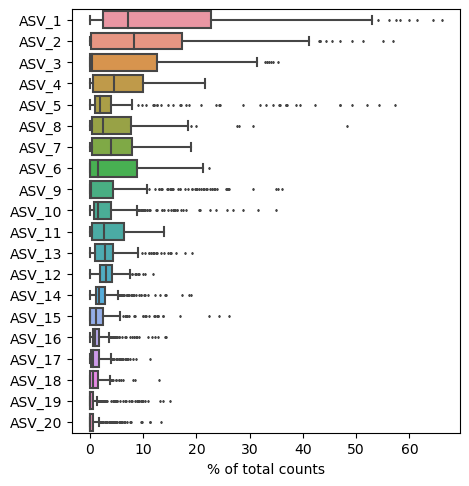

In [31]:
asv.plt_highest_expr_asv(adata, 20)

In [32]:
adata.to_df().head()

,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,ASV_9,ASV_10,...,ASV_1079,ASV_1080,ASV_1081,ASV_1082,ASV_1083,ASV_1084,ASV_1085,ASV_1086,ASV_1087,ASV_1088
sampleID,,,,,,,,,,,,,,,,,,,,,
1-D0AM,0.0,43.0,50.0,47.0,18.0,51.0,4.0,92.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D0PM,9.0,32.0,107.0,228.0,45.0,83.0,3.0,263.0,31.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D1AM,9.0,65.0,946.0,1865.0,487.0,2069.0,0.0,822.0,7438.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D1PM,53.0,90.0,2962.0,7008.0,1077.0,4632.0,0.0,209.0,6091.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D29AM,2729.0,9482.0,17.0,953.0,2350.0,681.0,1672.0,2630.0,18.0,776.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
adata2 = adata.copy()
asv.calculate_asv_metrics(adata2)   # custom function created using scanpy library

In [34]:
adata2

AnnData object with n_obs × n_vars = 339 × 1088
    obs: 'subject', 'time', 'Gentamicin', 'High Fat Diet', 'None', 'Vancomycin', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [35]:
adata2.var = adata2.var.rename(columns={'n_cells_by_counts':'Sample_Counts'}) # ASC column info

In [36]:
adata2.var

,Sample_Counts,mean_counts,pct_dropout_by_counts,total_counts
ASV_1,334,6549.126953,1.474926,2220154.0
ASV_2,319,5835.566406,5.899705,1978257.0
ASV_3,265,3747.616455,21.828909,1270442.0
ASV_4,338,2971.168213,0.294985,1007226.0
ASV_5,338,2572.286133,0.294985,872005.0
...,...,...,...,...
ASV_1084,1,0.005900,99.705015,2.0
ASV_1085,1,0.002950,99.705015,1.0
ASV_1086,1,0.002950,99.705015,1.0
ASV_1087,1,0.002950,99.705015,1.0


In [37]:
adata2.obs = adata2.obs.rename(columns={'n_genes_by_counts' : 'total_ASV_Counts', 'total_counts':'Total_Sequence_Counts'})

In [38]:
adata2.obs['pertubation'] = np.array(pertubation)   # adding again for color plot purpose

In [39]:
adata2.obs

,subject,time,Gentamicin,High Fat Diet,None,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation
sampleID,,,,,,,,,
1-D0AM,1,0.0,0,0,1,0,92,23484.0,None
1-D0PM,1,0.5,0,0,1,0,96,26867.0,None
1-D1AM,1,1.0,0,0,1,0,56,41510.0,None
1-D1PM,1,1.5,0,0,1,0,53,40339.0,None
1-D29AM,1,29.0,0,0,1,0,114,42895.0,None
...,...,...,...,...,...,...,...,...,...
M2-D9-1B,M2-D9,1.0,0,0,1,0,113,62799.0,None
M2-D9-2A,M2-D9,2.0,0,0,1,0,134,92260.0,None
M2-D9-2B,M2-D9,3.0,0,0,1,0,115,68001.0,None


In [40]:
adata2.var.head()

,Sample_Counts,mean_counts,pct_dropout_by_counts,total_counts
ASV_1,334,6549.126953,1.474926,2220154.0
ASV_2,319,5835.566406,5.899705,1978257.0
ASV_3,265,3747.616455,21.828909,1270442.0
ASV_4,338,2971.168213,0.294985,1007226.0
ASV_5,338,2572.286133,0.294985,872005.0


In [41]:
rdp_species = rdp_species.rename(columns = {'Unnamed: 0':'ASV'})

In [42]:
rdp_species = rdp_species.set_index('ASV')

In [43]:
rdp_species.head()

,sequence,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis
ASV_2,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,NaN
ASV_3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN


In [44]:
sequence = np.array(rdp_species['sequence'])

In [45]:
adata2.var.insert(0, 'rdp_sequence', str(sequence[0]))
adata2.var = adata2.var.join(rdp_species.iloc[:,1:])

In [46]:
silva_species.head()

,Unnamed: 0,Unnamed: 1,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
1,ASV_2,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
2,ASV_3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
3,ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/ovatus
4,ASV_5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN


In [47]:
silva_species.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Kingdom', 'Phylum', 'Class', 'Order',
       'Family', 'Genus', 'Species'],
      dtype='object')

In [48]:
adata2.var.columns

Index(['rdp_sequence', 'Sample_Counts', 'mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family',
       'Genus', 'Species'],
      dtype='object')

In [49]:
adata2.var = adata2.var.rename(columns={'Kingdom':'rdp_kingdom','Phylum':'rdp_phylum','Class': 'rdp_class', 'Order':'rdp_order',
                                        'Family':'rdp_family','Genus':'rdp_genus','Species':'rdp_species'})

In [50]:
print(list(adata2.var['rdp_sequence']) == list(silva_species['Unnamed: 1']))

False


In [51]:
for i in range(7):
    print(list(adata2.var[adata2.var.columns[i]]) == list(silva_species[silva_species.columns[i-5]]))

False
False
False
False
False
False
False


In [52]:
adata2.var.insert(1,'silva_sequence',np.array(silva_species['Unnamed: 1']))
adata2.var.insert(7,'silva_kingdom',np.array(silva_species['Kingdom']))
adata2.var.insert(9,'silva_phylum',np.array(silva_species['Phylum']))
adata2.var.insert(11,'silva_class',np.array(silva_species['Class']))
adata2.var.insert(13,'silva_order',np.array(silva_species['Order']))
adata2.var.insert(15,'silva_family',np.array(silva_species['Family']))
adata2.var.insert(17,'silva_genus',np.array(silva_species['Genus']))
adata2.var.insert(19,'silva_species',np.array(silva_species['Species']))

In [53]:
adata2.var['rdp_class']

ASV_1               Bacteroidia
ASV_2          Verrucomicrobiae
ASV_3               Bacteroidia
ASV_4               Bacteroidia
ASV_5               Bacteroidia
                   ...         
ASV_1084       Erysipelotrichia
ASV_1085                    NaN
ASV_1086             Clostridia
ASV_1087             Clostridia
ASV_1088    Deltaproteobacteria
Name: rdp_class, Length: 1088, dtype: object

In [54]:
silva_species = silva_species.set_index('Unnamed: 0')

In [55]:
adata2.var[adata2.var['rdp_family'] != silva_species['Family']]

,rdp_sequence,silva_sequence,Sample_Counts,mean_counts,pct_dropout_by_counts,total_counts,rdp_kingdom,silva_kingdom,rdp_phylum,silva_phylum,rdp_class,silva_class,rdp_order,silva_order,rdp_family,silva_family,rdp_genus,silva_genus,rdp_species,silva_species
ASV_10,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,331,1805.643066,2.359882,612113.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Porphyromonadaceae,Tannerellaceae,Parabacteroides,NaN,goldsteinii,NaN
ASV_14,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,313,1207.114990,7.669617,409212.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Porphyromonadaceae,Tannerellaceae,Parabacteroides,Parabacteroides,distasonis,distasonis
ASV_23,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,332,321.516235,2.064897,108994.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Porphyromonadaceae,Tannerellaceae,Parabacteroides,Parabacteroides,merdae,merdae
ASV_27,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGTAGGTGGCGAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAG...,62,206.185837,81.710914,69897.0,Bacteria,Bacteria,Firmicutes,Firmicutes,Clostridia,Clostridia,Clostridiales,Clostridiales,Clostridiaceae_1,Clostridiaceae,Clostridium_sensu_stricto,Clostridium sensu stricto 1,celatum/disporicum,NaN
ASV_32,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTG...,117,162.929199,65.486726,55233.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Porphyromonadaceae,Tannerellaceae,Parabacteroides,Parabacteroides,NaN,distasonis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_1083,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,1,0.005900,99.705015,2.0,Bacteria,Bacteria,Proteobacteria,NaN,Betaproteobacteria,NaN,Burkholderiales,NaN,Sutterellaceae,NaN,Parasutterella,NaN,NaN,NaN
ASV_1084,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGAATCATTGGGCGTAAAGAGGG...,1,0.005900,99.705015,2.0,Bacteria,Bacteria,Firmicutes,Firmicutes,Erysipelotrichia,Bacilli,Erysipelotrichales,Erysipelotrichales,Erysipelotrichaceae,Erysipelatoclostridiaceae,Coprobacillus,Coprobacillus,NaN,NaN
ASV_1085,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,1,0.002950,99.705015,1.0,Bacteria,Bacteria,NaN,Verrucomicrobiota,NaN,Verrucomicrobiae,NaN,Verrucomicrobiales,NaN,Akkermansiaceae,NaN,Akkermansia,NaN,NaN
ASV_1087,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTG...,1,0.002950,99.705015,1.0,Bacteria,Bacteria,Firmicutes,Firmicutes,Clostridia,Clostridia,Clostridiales,NaN,Ruminococcaceae,NaN,NaN,NaN,NaN,NaN


In [56]:
silva_species

,Unnamed: 1,Kingdom,Phylum,Class,Order,Family,Genus,Species
Unnamed: 0,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
ASV_2,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,muciniphila
ASV_3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,fragilis/ovatus
ASV_5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
...,...,...,...,...,...,...,...,...
ASV_1084,TACGGAGGATCCGAGCGTTATCCGGAATCATTGGGCGTAAAGAGGG...,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelatoclostridiaceae,Coprobacillus,NaN
ASV_1085,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,NaN
ASV_1086,TACTTATGTTTCCCTCTTTCTCCTGATTTCCTGGGTGTAAAGGGAG...,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,NaN,NaN


In [57]:
rdp_species

,sequence,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV,,,,,,,,
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,cellulosilyticus/timonensis
ASV_2,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,Bacteria,Verrucomicrobia,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,NaN
ASV_3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,ovatus
ASV_5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
...,...,...,...,...,...,...,...,...
ASV_1084,TACGGAGGATCCGAGCGTTATCCGGAATCATTGGGCGTAAAGAGGG...,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Coprobacillus,NaN
ASV_1085,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAG...,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
ASV_1086,TACTTATGTTTCCCTCTTTCTCCTGATTTCCTGGGTGTAAAGGGAG...,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NaN,NaN


In [58]:
adata2.var.head()  # completed the ASV sequence tables from meta data

,rdp_sequence,silva_sequence,Sample_Counts,mean_counts,pct_dropout_by_counts,total_counts,rdp_kingdom,silva_kingdom,rdp_phylum,silva_phylum,rdp_class,silva_class,rdp_order,silva_order,rdp_family,silva_family,rdp_genus,silva_genus,rdp_species,silva_species
ASV_1,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,334,6549.126953,1.474926,2220154.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Bacteroidaceae,Bacteroidaceae,Bacteroides,Bacteroides,cellulosilyticus/timonensis,NaN
ASV_2,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTG...,319,5835.566406,5.899705,1978257.0,Bacteria,Bacteria,Verrucomicrobia,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiales,Akkermansiaceae,Akkermansiaceae,Akkermansia,Akkermansia,NaN,muciniphila
ASV_3,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,265,3747.616455,21.828909,1270442.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Bacteroidaceae,Bacteroidaceae,Bacteroides,Bacteroides,ovatus,ovatus
ASV_4,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,338,2971.168213,0.294985,1007226.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Bacteroidaceae,Bacteroidaceae,Bacteroides,Bacteroides,ovatus,fragilis/ovatus
ASV_5,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAG...,338,2572.286133,0.294985,872005.0,Bacteria,Bacteria,Bacteroidetes,Bacteroidota,Bacteroidia,Bacteroidia,Bacteroidales,Bacteroidales,Bacteroidaceae,Bacteroidaceae,Bacteroides,Bacteroides,NaN,NaN


In [59]:
adata2.var.columns

Index(['rdp_sequence', 'silva_sequence', 'Sample_Counts', 'mean_counts',
       'pct_dropout_by_counts', 'total_counts', 'rdp_kingdom', 'silva_kingdom',
       'rdp_phylum', 'silva_phylum', 'rdp_class', 'silva_class', 'rdp_order',
       'silva_order', 'rdp_family', 'silva_family', 'rdp_genus', 'silva_genus',
       'rdp_species', 'silva_species'],
      dtype='object')

In [60]:
adata2.obs.head()

,subject,time,Gentamicin,High Fat Diet,None,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation
sampleID,,,,,,,,,
1-D0AM,1,0.0,0,0,1,0,92,23484.0,None
1-D0PM,1,0.5,0,0,1,0,96,26867.0,None
1-D1AM,1,1.0,0,0,1,0,56,41510.0,None
1-D1PM,1,1.5,0,0,1,0,53,40339.0,None
1-D29AM,1,29.0,0,0,1,0,114,42895.0,None


<u>Using Set method to find out the missing measurments samples

In [61]:
qcr_id = set(qPCR['sampleID'])      
obs_ids = set(adata2.obs.index)

union_sets = sorted(list(obs_ids | qcr_id)) # taking the union of both sets (no duplicate)

In [62]:
union_sets == sorted(list(obs_ids))     # checking if both union and obs_ids are same

True

In [63]:
b_ids = list(obs_ids - qcr_id)  
b_ids = sorted(b_ids)

In [64]:
aa = []             
for i in range(len(b_ids)):
    aa.append([b_ids[i], None, None, None])

In [65]:
b_ids_DF = pd.DataFrame(aa, columns = ['sampleID','measurement1', 'measurement2', 'measurement3'])

In [66]:
b_ids_DF

,sampleID,measurement1,measurement2,measurement3
0,1-D0AM,None,None,None
1,1-D0PM,None,None,None
2,1-D1AM,None,None,None
3,1-D1PM,None,None,None
4,1-D29AM,None,None,None
5,1-D29PM,None,None,None
6,1-D2AM,None,None,None
7,1-D2PM,None,None,None
8,1-D3AM,None,None,None
9,1-D3PM,None,None,None


In [67]:
qPCR

,sampleID,measurement1,measurement2,measurement3
0,2-D0AM,8.097580e+06,8.536466e+06,9.538355e+06
1,2-D0PM,2.972797e+07,5.614127e+07,2.436439e+07
2,2-D10,4.129004e+10,6.423568e+10,8.384557e+10
3,2-D11,2.981363e+10,6.587538e+10,5.077812e+10
4,2-D14,1.647771e+10,7.104907e+10,2.498869e+10
...,...,...,...,...
319,M2-D9-1B,5.956325e+10,1.360000e+11,1.280000e+11
320,M2-D9-2A,5.956325e+10,1.360000e+11,1.280000e+11
321,M2-D9-2B,5.956325e+10,1.360000e+11,1.280000e+11
322,M2-D9-3A,5.956325e+10,1.360000e+11,1.280000e+11


In [68]:
xx = [val for val in b_ids_DF['sampleID']]      # accumulating all  sample iD's
for val in qPCR['sampleID']:
    xx.append(val)


In [69]:
xx[15:20]

['2-D0AM', '2-D0PM', '2-D10', '2-D11', '2-D14']

In [70]:
hh = []
for i in range(len(xx)):
    if i < 15:
        hh.append([xx[i], None, None, None])
    else:
        hh.append([xx[i], qPCR.iloc[(i-15),1], qPCR.iloc[(i-15),2], qPCR.iloc[(i-15),3]])

In [71]:
hh = np.array(hh)

In [72]:
new_b_df = pd.DataFrame(hh, columns = qPCR.columns)         
new_b_df = new_b_df.set_index('sampleID')

In [73]:
new_b_df

,measurement1,measurement2,measurement3
sampleID,,,
1-D0AM,None,None,None
1-D0PM,None,None,None
1-D1AM,None,None,None
1-D1PM,None,None,None
1-D29AM,None,None,None
...,...,...,...
M2-D9-1B,59563252959.0,136000000000.0,128000000000.0
M2-D9-2A,59563252959.0,136000000000.0,128000000000.0
M2-D9-2B,59563252959.0,136000000000.0,128000000000.0


In [74]:
adata2.obs = adata2.obs.join(new_b_df)  # joining measurment columns to anndata observation table

In [75]:
adata2.obs['Average_Measurments'] = adata2.obs[['measurement1','measurement2','measurement3']].mean(axis=1)

In [76]:
adata2.obs.head(20)

,subject,time,Gentamicin,High Fat Diet,None,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation,measurement1,measurement2,measurement3,Average_Measurments
sampleID,,,,,,,,,,,,,
1-D0AM,1,0.0,0,0,1,0,92,23484.0,None,None,None,None,NaN
1-D0PM,1,0.5,0,0,1,0,96,26867.0,None,None,None,None,NaN
1-D1AM,1,1.0,0,0,1,0,56,41510.0,None,None,None,None,NaN
1-D1PM,1,1.5,0,0,1,0,53,40339.0,None,None,None,None,NaN
1-D29AM,1,29.0,0,0,1,0,114,42895.0,None,None,None,None,NaN
1-D29PM,1,29.5,0,0,1,0,120,38983.0,None,None,None,None,NaN
1-D2AM,1,2.0,0,0,1,0,89,42737.0,None,None,None,None,NaN
1-D2PM,1,2.5,0,0,1,0,106,61758.0,None,None,None,None,NaN
1-D3AM,1,3.0,0,0,1,0,95,41797.0,None,None,None,None,NaN


<u>Visualizing the ASV counts with violing plot

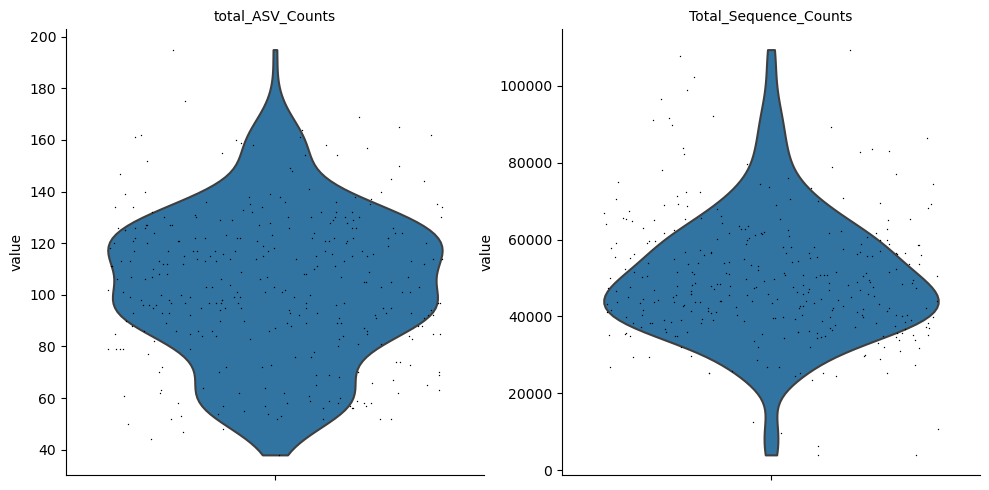

In [77]:
sc.pl.violin(adata2, ['total_ASV_Counts', 'Total_Sequence_Counts'], jitter=0.4, multi_panel=True)

In [78]:
adata2.obs.loc[adata2.obs['Total_Sequence_Counts'].idxmax()]     # highest count

subject                                   3
time                                   46.0
Gentamicin                                0
High Fat Diet                             0
None                                      1
Vancomycin                                0
total_ASV_Counts                         79
Total_Sequence_Counts              109461.0
pertubation                            None
measurement1                   9967287903.0
measurement2                  23827311973.0
measurement3                  11352386148.0
Average_Measurments      15048995341.333334
Name: 3-D46, dtype: object

<u>Visualizing sequences in scatter plot

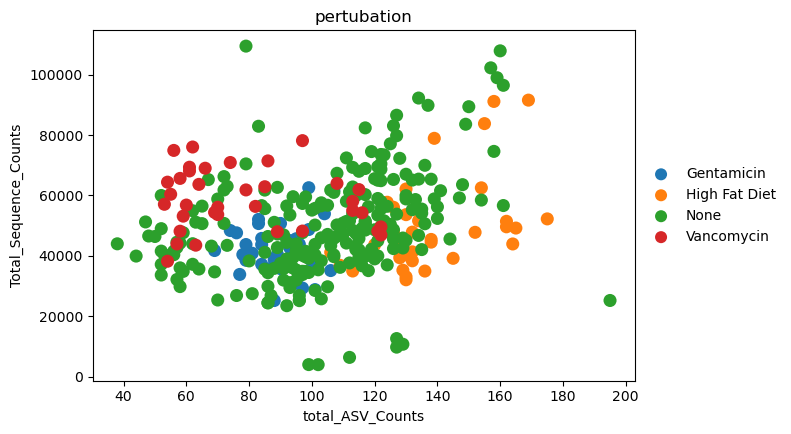

In [79]:
sc.pl.scatter(adata2, x= 'total_ASV_Counts', y='Total_Sequence_Counts', color= 'pertubation' )  # fix this plot by choosing color

In [80]:
adata3 = adata2.copy()

<u>Plotting all the sequence counts from ASV

/Users/irsathazeez/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


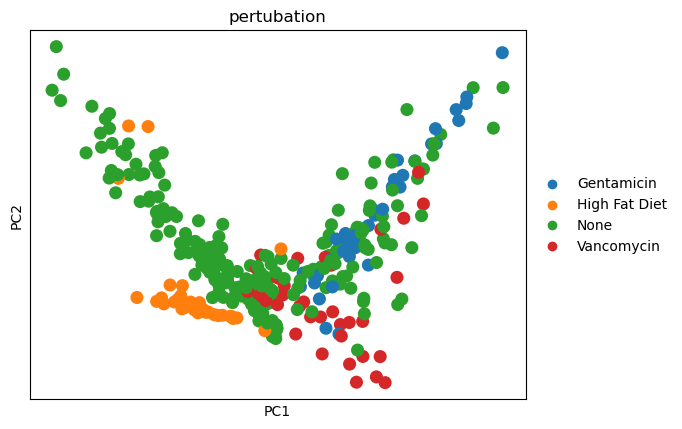

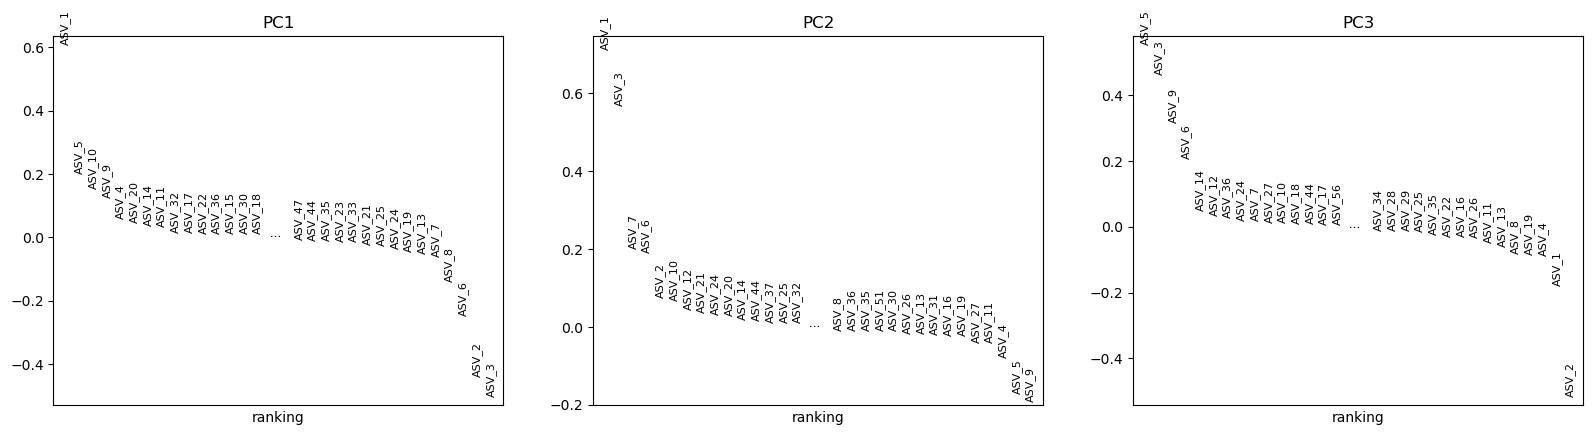

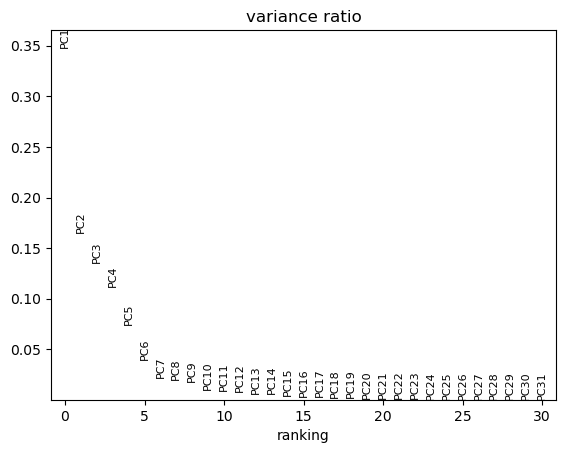

In [81]:
sc.pp.pca(adata3)
sc.pl.pca_overview(adata3, color='pertubation')

In [82]:
adata3.obsm

AxisArrays with keys: X_pca

In [83]:
adata3.varm

AxisArrays with keys: PCs

In [84]:
adata3.varm['PCs'][0]

array([ 6.05500102e-01,  7.11643696e-01, -1.80759102e-01,  1.49009064e-01,
        1.09489486e-01, -5.28588379e-03, -1.31067708e-01,  9.70555991e-02,
       -1.57002121e-01, -2.02130936e-02,  8.31994135e-03,  1.03619071e-02,
       -1.31288124e-02,  3.92889939e-02, -1.90900341e-02, -5.69499657e-03,
       -2.31644660e-02,  2.57397592e-02, -4.79371063e-02, -6.05029101e-03,
        2.68997662e-02,  9.68827121e-03, -2.46676803e-02,  5.76905767e-03,
        7.55579397e-03, -2.88993874e-06,  1.55938917e-03, -4.45306581e-03,
       -9.88591812e-04, -1.84771437e-02, -8.79853871e-03,  9.40224156e-03,
        8.01925547e-04,  7.32040172e-03,  3.02054221e-03, -7.09054898e-03,
        8.90575536e-03,  4.75429045e-03,  3.76980868e-03,  1.06718913e-02,
       -4.57205839e-04,  4.16576164e-03,  3.97558848e-04,  7.53876055e-04,
        4.42600297e-03,  2.62448593e-04,  2.24217633e-03, -2.70384341e-03,
        1.66983728e-03, -3.50120070e-04], dtype=float32)

In [85]:
adata3.obsm['X_pca']

array([[ 2.7472409e+02, -7.6108501e+03,  5.9278754e+02, ...,
         3.9271946e+01,  1.1128742e+01, -5.8625011e+01],
       [ 2.4417613e+02, -7.4634551e+03,  5.6186261e+02, ...,
         1.3182272e+02, -6.0629780e+01, -2.6503286e+00],
       [ 1.6482028e+02, -8.5761035e+03,  3.5818584e+03, ...,
         1.2132534e+02, -7.6267952e+01,  4.0552158e+01],
       ...,
       [-1.7274215e+04,  1.0582281e+04,  3.0548162e+03, ...,
         2.8895653e+01,  2.5152149e+01, -2.8789671e+01],
       [-2.1370131e+04,  1.5248591e+04,  4.5844351e+03, ...,
        -4.8674500e+01, -5.9979713e+01, -1.3276927e+02],
       [-1.6219474e+04,  1.0957676e+04,  5.0839580e+03, ...,
         1.4706709e+01,  3.4711758e+01, -6.2067341e+01]], dtype=float32)

In [86]:
adata3

AnnData object with n_obs × n_vars = 339 × 1088
    obs: 'subject', 'time', 'Gentamicin', 'High Fat Diet', 'None', 'Vancomycin', 'total_ASV_Counts', 'Total_Sequence_Counts', 'pertubation', 'measurement1', 'measurement2', 'measurement3', 'Average_Measurments'
    var: 'rdp_sequence', 'silva_sequence', 'Sample_Counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rdp_kingdom', 'silva_kingdom', 'rdp_phylum', 'silva_phylum', 'rdp_class', 'silva_class', 'rdp_order', 'silva_order', 'rdp_family', 'silva_family', 'rdp_genus', 'silva_genus', 'rdp_species', 'silva_species'
    uns: 'pertubation_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [87]:
# I did this because it gave me problem in saving anndata with null value and float so i converted all to float. This fixed the saving issue
adata3.obs[['measurement1','measurement2','measurement3']] = adata3.obs[['measurement1','measurement2','measurement3']].astype('float32')

In [88]:
adata3.obs.drop(['None'], axis=1, inplace=True)

<u>Samples that have no qPCR measurments

In [89]:
adata3.obs[adata3.obs.isnull().any(axis=1) == True] # found one sample in the middle which does not have measurments

,subject,time,Gentamicin,High Fat Diet,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation,measurement1,measurement2,measurement3,Average_Measurments
sampleID,,,,,,,,,,,,
1-D0AM,1,0.0,0,0,0,92,23484.0,None,NaN,NaN,NaN,NaN
1-D0PM,1,0.5,0,0,0,96,26867.0,None,NaN,NaN,NaN,NaN
1-D1AM,1,1.0,0,0,0,56,41510.0,None,NaN,NaN,NaN,NaN
1-D1PM,1,1.5,0,0,0,53,40339.0,None,NaN,NaN,NaN,NaN
1-D29AM,1,29.0,0,0,0,114,42895.0,None,NaN,NaN,NaN,NaN
1-D29PM,1,29.5,0,0,0,120,38983.0,None,NaN,NaN,NaN,NaN
1-D2AM,1,2.0,0,0,0,89,42737.0,None,NaN,NaN,NaN,NaN
1-D2PM,1,2.5,0,0,0,106,61758.0,None,NaN,NaN,NaN,NaN
1-D3AM,1,3.0,0,0,0,95,41797.0,None,NaN,NaN,NaN,NaN


In [90]:
adata3.obs.loc['inoculum1-5']

subject                  Healthy
time                         0.0
Gentamicin                     0
High Fat Diet                  0
Vancomycin                     0
total_ASV_Counts             195
Total_Sequence_Counts    25210.0
pertubation                 None
measurement1                 NaN
measurement2                 NaN
measurement3                 NaN
Average_Measurments          NaN
Name: inoculum1-5, dtype: object

<u>Normalizing the samples to target value to 1.

In [91]:
adata3

AnnData object with n_obs × n_vars = 339 × 1088
    obs: 'subject', 'time', 'Gentamicin', 'High Fat Diet', 'Vancomycin', 'total_ASV_Counts', 'Total_Sequence_Counts', 'pertubation', 'measurement1', 'measurement2', 'measurement3', 'Average_Measurments'
    var: 'rdp_sequence', 'silva_sequence', 'Sample_Counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rdp_kingdom', 'silva_kingdom', 'rdp_phylum', 'silva_phylum', 'rdp_class', 'silva_class', 'rdp_order', 'silva_order', 'rdp_family', 'silva_family', 'rdp_genus', 'silva_genus', 'rdp_species', 'silva_species'
    uns: 'pertubation_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [92]:
normalized_adata = adata3.copy()

In [93]:
asv.normalize_per_sample(normalized_adata, 1)   # custome method

In [94]:
normalized_adata.X.sum(axis=1)

array([1.0000001 , 0.99999994, 0.99999994, 1.        , 0.9999999 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.9999999 , 1.        , 1.0000001 , 1.        , 0.99999994,
       1.        , 1.        , 1.        , 0.99999994, 0.99999994,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 0.99999994, 0.99999994, 1.        ,
       1.0000001 , 0.99999994, 1.        , 0.99999994, 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 0.99999994,
       1.        , 1.        , 1.0000001 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.0000001 , 1.0000001 , 1.        , 0.99999994,
       1.0000001 , 1.        , 1.        , 1.        , 0.99999994,
       1.0000001 , 1.        , 1.        , 1.        , 1.0000001 ,
       1.        , 1.        , 0.9999999 , 1.0000001 , 1.        ,
       1.        , 0.99999994, 0.99999994, 1.        , 1.     

In [95]:
normalized_adata.obs

,subject,time,Gentamicin,High Fat Diet,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation,measurement1,measurement2,measurement3,Average_Measurments,n_counts
sampleID,,,,,,,,,,,,,
1-D0AM,1,0.0,0,0,0,92,23484.0,None,NaN,NaN,NaN,NaN,23484.0
1-D0PM,1,0.5,0,0,0,96,26867.0,None,NaN,NaN,NaN,NaN,26867.0
1-D1AM,1,1.0,0,0,0,56,41510.0,None,NaN,NaN,NaN,NaN,41510.0
1-D1PM,1,1.5,0,0,0,53,40339.0,None,NaN,NaN,NaN,NaN,40339.0
1-D29AM,1,29.0,0,0,0,114,42895.0,None,NaN,NaN,NaN,NaN,42895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
M2-D9-1B,M2-D9,1.0,0,0,0,113,62799.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,62799.0
M2-D9-2A,M2-D9,2.0,0,0,0,134,92260.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,92260.0
M2-D9-2B,M2-D9,3.0,0,0,0,115,68001.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,68001.0


In [96]:
normalized_adata.X

array([[0.0000000e+00, 1.8310338e-03, 2.1291091e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.3498343e-04, 1.1910523e-03, 3.9825807e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1681523e-04, 1.5658877e-03, 2.2789689e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.5646388e-02, 2.3209953e-01, 3.0976015e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.1887600e-02, 2.1100907e-01, 3.0468434e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.1485546e-02, 1.9493929e-01, 3.3957961e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

<u>adding normalized data and raw data to adata layers

In [97]:
adata = adata3.copy() 

In [98]:
adata.layers['normalized_data'] = normalized_adata.copy()

In [99]:
adata.layers['raw_data'] = raw_data.copy()      # adding the raw data to new layer in the anndata object

In [100]:
adata.layers['raw_data']

AnnData object with n_obs × n_vars = 339 × 1088

In [101]:
adata.layers['normalized_data']

AnnData object with n_obs × n_vars = 339 × 1088
    obs: 'subject', 'time', 'Gentamicin', 'High Fat Diet', 'Vancomycin', 'total_ASV_Counts', 'Total_Sequence_Counts', 'pertubation', 'measurement1', 'measurement2', 'measurement3', 'Average_Measurments', 'n_counts'
    var: 'rdp_sequence', 'silva_sequence', 'Sample_Counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rdp_kingdom', 'silva_kingdom', 'rdp_phylum', 'silva_phylum', 'rdp_class', 'silva_class', 'rdp_order', 'silva_order', 'rdp_family', 'silva_family', 'rdp_genus', 'silva_genus', 'rdp_species', 'silva_species'
    uns: 'pertubation_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [102]:
adata.X

array([[0.0000e+00, 4.3000e+01, 5.0000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0000e+00, 3.2000e+01, 1.0700e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.0000e+00, 6.5000e+01, 9.4600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.1040e+03, 1.5783e+04, 2.1064e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.6260e+03, 1.8266e+04, 2.6375e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.3410e+03, 1.2650e+04, 2.2036e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], dtype=float32)

In [103]:
adata.layers['normalized_data'].X

array([[0.0000000e+00, 1.8310338e-03, 2.1291091e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.3498343e-04, 1.1910523e-03, 3.9825807e-03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.1681523e-04, 1.5658877e-03, 2.2789689e-02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [4.5646388e-02, 2.3209953e-01, 3.0976015e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.1887600e-02, 2.1100907e-01, 3.0468434e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.1485546e-02, 1.9493929e-01, 3.3957961e-01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

Normalized adata PCA overview

/Users/irsathazeez/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


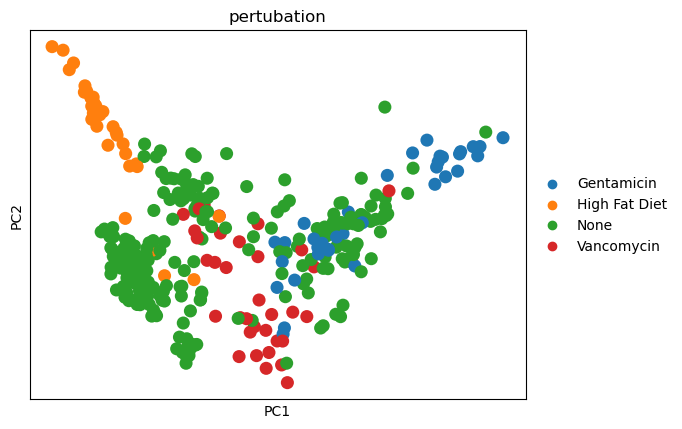

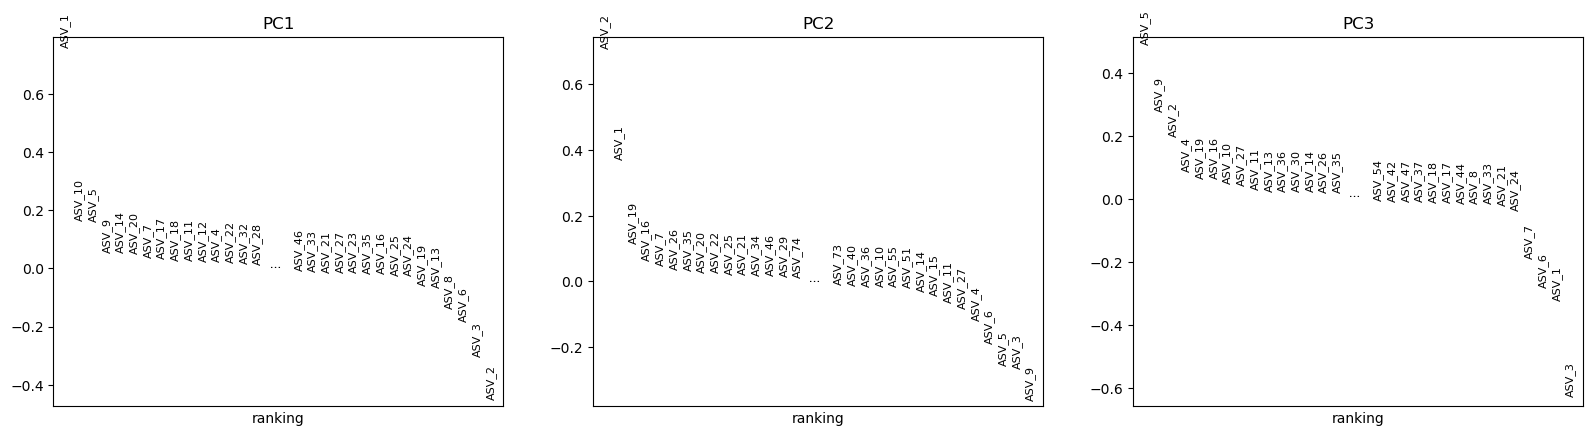

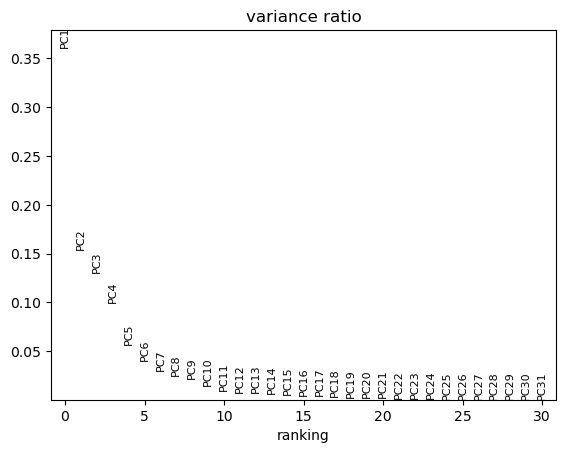

In [104]:
sc.pp.pca(adata.layers['normalized_data'])
sc.pl.pca_overview(adata.layers['normalized_data'], color='pertubation')

In [105]:
normalized_adata.obs.groupby(['subject','time']).count().sort_values(by=['time','subject'], ascending=[True,True])

Gentamicin  High Fat Diet  Vancomycin  total_ASV_Counts  \
subject time                                                            
1       0.0            1              1           1                 1   
2       0.0            1              1           1                 1   
3       0.0            1              1           1                 1   
4       0.0            1              1           1                 1   
5       0.0            1              1           1                 1   
...                  ...            ...         ...               ...   
        64.5           1              1           1                 1   
Healthy 64.5           0              0           0                 0   
M2-D8   64.5           0              0           0                 0   
M2-D9   64.5           0              0           0                 0   
M2-D10  64.5           0              0           0                 0   

              Total_Sequence_Counts  pertubation  measurement1  measurement2  \
subject time                                                                   
1       0.0                       1            1             0             0   
2       0.0                       1            1             1             1   
3       0.0                       1            1             1             1   
4       0.0                       1            1             1             1   
5       0.0                       1            1             1             1   
...                             ...          ...           ...           ...   
        64.5                      1            1             1             1   
Healthy 64.5                      0            0             0             0   
M2-D8   64.5                      0            0             0             0   
M2-D9   64.5                      0            0             0             0   
M2-D10  64.5                      0            0             0             0   

              measurement3  Average_Measurments  n_counts  
subject time                                               
1       0.0              0                    0         1  
2       0.0              1                    1         1  
3       0.0              1                    1         1  
4       0.0              1                    1         1  
5       0.0              1                    1         1  
...                    ...                  ...       ...  
        64.5             1                    1         1  
Healthy 64.5             0                    0         0  
M2-D8   64.5             0                    0         0  
M2-D9   64.5             0                    0         0  
M2-D10  64.5             0                    0         0  

[693 rows x 11 columns]

In [106]:
rel_abundance = adata3.copy()

<u>Getting absolute abundance and relative abundance and adding that data in adata layer

In [107]:
for i in range(rel_abundance.X.shape[0]):
    for j in range(rel_abundance.X.shape[1]):
        rel_abundance.X[i][j] = (rel_abundance.X[i][j] / adata.obs['Total_Sequence_Counts'][i]) 

In [108]:
absolute_abundance = rel_abundance.copy() 

In [109]:
for i in range(absolute_abundance.X.shape[0]):
    for j in range(absolute_abundance.X.shape[1]):
        absolute_abundance.X[i][j] = (absolute_abundance.X[i][j] * adata.obs['Average_Measurments'][i]) 

In [110]:
asv.calculate_asv_metrics(absolute_abundance)
asv.calculate_asv_metrics(rel_abundance)

In [111]:
adata.layers['absolute_abundance'] = absolute_abundance.copy()
adata.layers['relative_abundance'] = rel_abundance.copy()

In [112]:
adata.layers['absolute_abundance'].obs
adata.layers['absolute_abundance'].obs['total_ASV_Counts'] = adata.layers['absolute_abundance'].obs['n_genes_by_counts']
adata.layers['absolute_abundance'].obs['Total_Sequence_Counts'] = adata.layers['absolute_abundance'].obs['total_counts']
adata.layers['absolute_abundance'].obs = adata.layers['absolute_abundance'].obs.drop(columns=['total_counts','n_genes_by_counts'])

In [113]:
adata.layers['relative_abundance'].obs
adata.layers['relative_abundance'].obs = adata.layers['relative_abundance'].obs.drop(columns='n_genes_by_counts')
adata.layers['relative_abundance'].obs = adata.layers['relative_abundance'].obs.rename(columns={'total_counts':'total_sum'})


In [114]:
adata.layers['relative_abundance'].obs

,subject,time,Gentamicin,High Fat Diet,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation,measurement1,measurement2,measurement3,Average_Measurments,total_sum
sampleID,,,,,,,,,,,,,
1-D0AM,1,0.0,0,0,0,92,23484.0,None,NaN,NaN,NaN,NaN,1.0
1-D0PM,1,0.5,0,0,0,96,26867.0,None,NaN,NaN,NaN,NaN,1.0
1-D1AM,1,1.0,0,0,0,56,41510.0,None,NaN,NaN,NaN,NaN,1.0
1-D1PM,1,1.5,0,0,0,53,40339.0,None,NaN,NaN,NaN,NaN,1.0
1-D29AM,1,29.0,0,0,0,114,42895.0,None,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
M2-D9-1B,M2-D9,1.0,0,0,0,113,62799.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,1.0
M2-D9-2A,M2-D9,2.0,0,0,0,134,92260.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,1.0
M2-D9-2B,M2-D9,3.0,0,0,0,115,68001.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,1.0


In [115]:
adata.layers['relative_abundance'].obs['total_sum'].sum() # which is equal to total number of samples

339.0

In [116]:
adata.layers['absolute_abundance'].obs

,subject,time,Gentamicin,High Fat Diet,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation,measurement1,measurement2,measurement3,Average_Measurments
sampleID,,,,,,,,,,,,
1-D0AM,1,0.0,0,0,0,1088,NaN,None,NaN,NaN,NaN,NaN
1-D0PM,1,0.5,0,0,0,1088,NaN,None,NaN,NaN,NaN,NaN
1-D1AM,1,1.0,0,0,0,1088,NaN,None,NaN,NaN,NaN,NaN
1-D1PM,1,1.5,0,0,0,1088,NaN,None,NaN,NaN,NaN,NaN
1-D29AM,1,29.0,0,0,0,1088,NaN,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
M2-D9-1B,M2-D9,1.0,0,0,0,113,1.078544e+11,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11
M2-D9-2A,M2-D9,2.0,0,0,0,134,1.078544e+11,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11
M2-D9-2B,M2-D9,3.0,0,0,0,115,1.078544e+11,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11


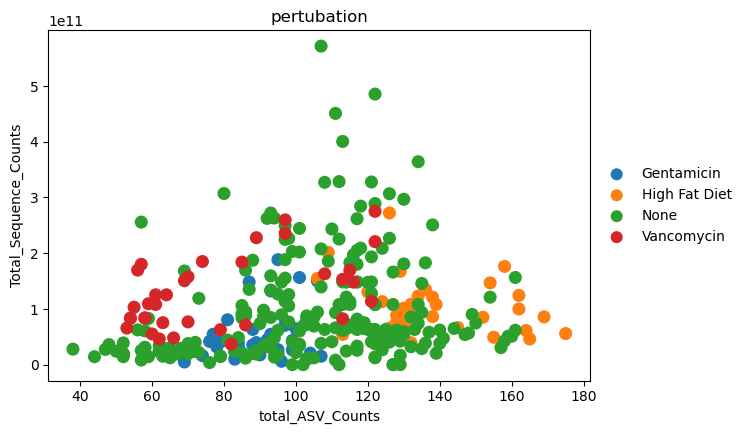

In [117]:
sc.pl.scatter(adata.layers['absolute_abundance'], x= 'total_ASV_Counts', y='Total_Sequence_Counts', color= 'pertubation' ) 

In [118]:
adata.layers['relative_abundance'].obs

,subject,time,Gentamicin,High Fat Diet,Vancomycin,total_ASV_Counts,Total_Sequence_Counts,pertubation,measurement1,measurement2,measurement3,Average_Measurments,total_sum
sampleID,,,,,,,,,,,,,
1-D0AM,1,0.0,0,0,0,92,23484.0,None,NaN,NaN,NaN,NaN,1.0
1-D0PM,1,0.5,0,0,0,96,26867.0,None,NaN,NaN,NaN,NaN,1.0
1-D1AM,1,1.0,0,0,0,56,41510.0,None,NaN,NaN,NaN,NaN,1.0
1-D1PM,1,1.5,0,0,0,53,40339.0,None,NaN,NaN,NaN,NaN,1.0
1-D29AM,1,29.0,0,0,0,114,42895.0,None,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
M2-D9-1B,M2-D9,1.0,0,0,0,113,62799.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,1.0
M2-D9-2A,M2-D9,2.0,0,0,0,134,92260.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,1.0
M2-D9-2B,M2-D9,3.0,0,0,0,115,68001.0,None,5.956325e+10,1.360000e+11,1.280000e+11,1.078544e+11,1.0


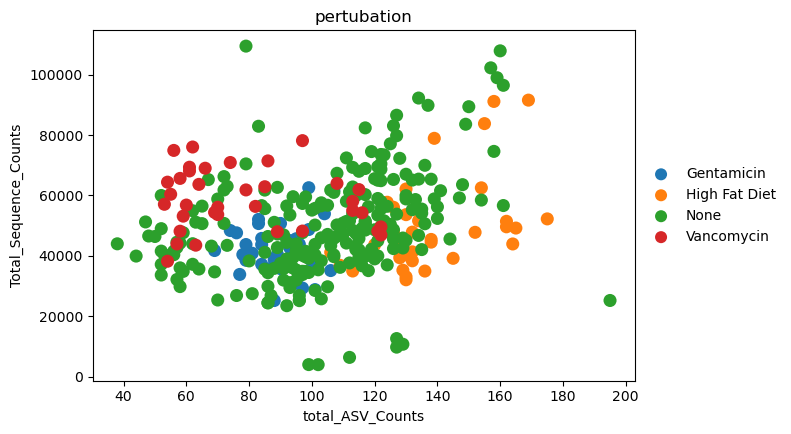

In [119]:
sc.pl.scatter(adata, x= 'total_ASV_Counts', y='Total_Sequence_Counts', color= 'pertubation' )

<u>Relative abundance sequence PCA overview

/Users/irsathazeez/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


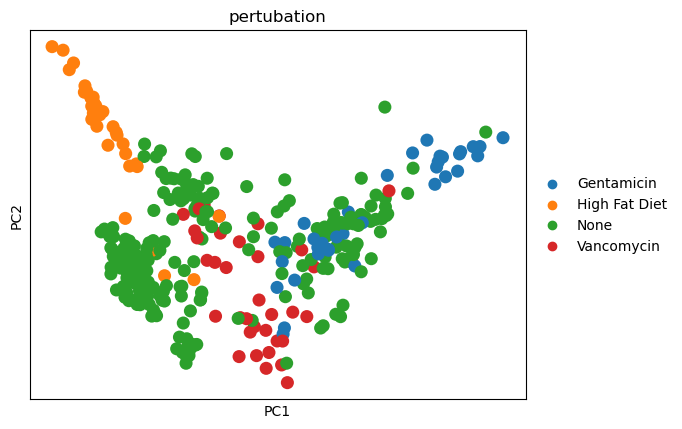

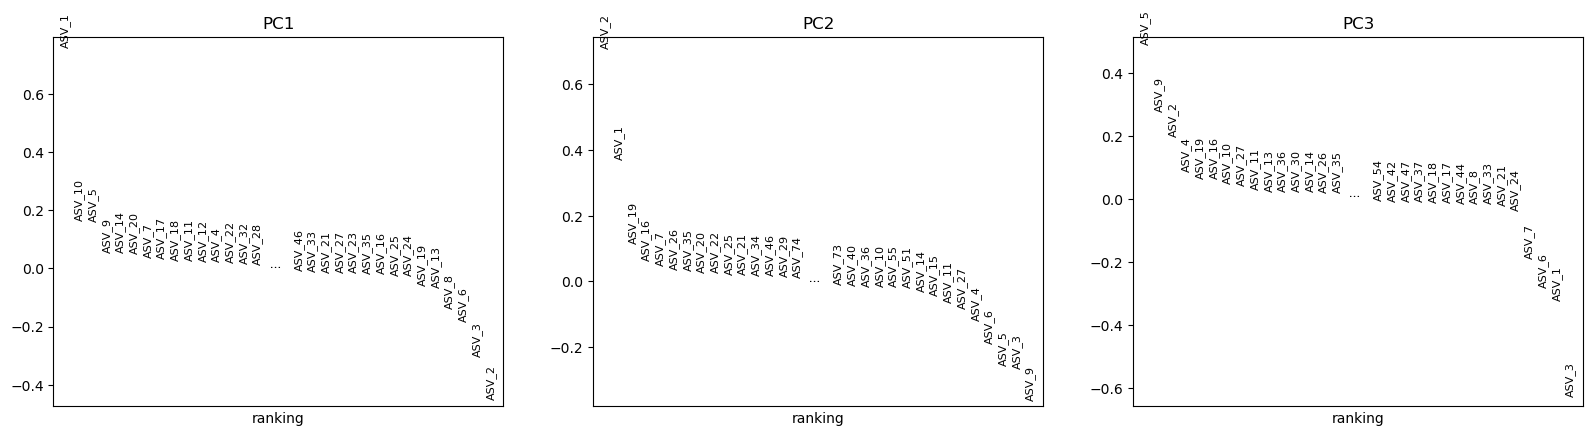

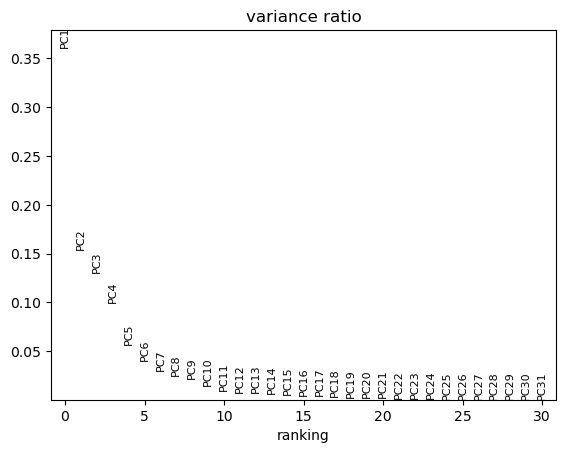

In [120]:
sc.pp.pca(adata.layers['relative_abundance'])
sc.pl.pca_overview(adata.layers['relative_abundance'], color='pertubation')

<b><i><u>Complete anndata with multiple layers</b></i>

In [121]:
adata

AnnData object with n_obs × n_vars = 339 × 1088
    obs: 'subject', 'time', 'Gentamicin', 'High Fat Diet', 'Vancomycin', 'total_ASV_Counts', 'Total_Sequence_Counts', 'pertubation', 'measurement1', 'measurement2', 'measurement3', 'Average_Measurments'
    var: 'rdp_sequence', 'silva_sequence', 'Sample_Counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rdp_kingdom', 'silva_kingdom', 'rdp_phylum', 'silva_phylum', 'rdp_class', 'silva_class', 'rdp_order', 'silva_order', 'rdp_family', 'silva_family', 'rdp_genus', 'silva_genus', 'rdp_species', 'silva_species'
    uns: 'pertubation_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'normalized_data', 'raw_data', 'absolute_abundance', 'relative_abundance'

In [122]:
adata.layers['relative_abundance']

AnnData object with n_obs × n_vars = 339 × 1088
    obs: 'subject', 'time', 'Gentamicin', 'High Fat Diet', 'Vancomycin', 'total_ASV_Counts', 'Total_Sequence_Counts', 'pertubation', 'measurement1', 'measurement2', 'measurement3', 'Average_Measurments', 'total_sum'
    var: 'rdp_sequence', 'silva_sequence', 'Sample_Counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rdp_kingdom', 'silva_kingdom', 'rdp_phylum', 'silva_phylum', 'rdp_class', 'silva_class', 'rdp_order', 'silva_order', 'rdp_family', 'silva_family', 'rdp_genus', 'silva_genus', 'rdp_species', 'silva_species', 'n_cells_by_counts'
    uns: 'pertubation_colors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [123]:
adata.layers['absolute_abundance'].to_df()

,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,ASV_9,ASV_10,...,ASV_1079,ASV_1080,ASV_1081,ASV_1082,ASV_1083,ASV_1084,ASV_1085,ASV_1086,ASV_1087,ASV_1088
sampleID,,,,,,,,,,,,,,,,,,,,,
1-D0AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-D0PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-D1AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-D1PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-D29AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M2-D9-1B,4.999510e+09,1.943128e+10,3.580892e+10,111634528.0,1.054517e+09,9.433977e+09,1.271603e+10,300554496.0,30914178.0,474017408.0,...,3434908.75,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
M2-D9-2A,4.482049e+09,2.227113e+10,3.187936e+10,143790304.0,9.679542e+08,9.321820e+09,1.286865e+10,249002720.0,22211510.0,376426624.0,...,0.00,2338053.75,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
M2-D9-2B,4.923165e+09,2.503296e+10,3.340900e+10,158607104.0,9.294376e+08,9.478360e+09,9.689308e+09,223636016.0,90406048.0,434583488.0,...,0.00,0.00,3172142.25,0.00,0.00,0.0,0.0,0.0,0.0,0.0


Saving the anndata to the disk in .h5ad format (Hierarchical Data Format)

In [124]:
adata.write_h5ad('summer_research.h5ad')    #  check with plugin compression

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b><i><u><h style="font-size:20px; color:red">Time Series Analysis</b></i></u></style>

In [125]:
from ts2ml.core import add_missing_slots
from ts2ml.core import transform_ts_data_into_features_and_target

In [149]:
asvData = sc.read_h5ad('summer_research.h5ad')
asvData

AnnData object with n_obs × n_vars = 339 × 1088
    obs: 'subject', 'time', 'Gentamicin', 'High Fat Diet', 'Vancomycin', 'total_ASV_Counts', 'Total_Sequence_Counts', 'pertubation', 'measurement1', 'measurement2', 'measurement3', 'Average_Measurments'
    var: 'rdp_sequence', 'silva_sequence', 'Sample_Counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rdp_kingdom', 'silva_kingdom', 'rdp_phylum', 'silva_phylum', 'rdp_class', 'silva_class', 'rdp_order', 'silva_order', 'rdp_family', 'silva_family', 'rdp_genus', 'silva_genus', 'rdp_species', 'silva_species'
    uns: 'pca', 'pertubation_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'absolute_abundance', 'normalized_data', 'raw_data', 'relative_abundance'

In [192]:
asvData.obs['subject'].value_counts()

2          77
5          77
4          76
3          75
1          15
M2-D8       6
M2-D9       6
M2-D10      6
Healthy     1
Name: subject, dtype: int64

In [193]:
asvData.obs['subject'].unique()

['1', '2', '3', '4', '5', 'Healthy', 'M2-D10', 'M2-D8', 'M2-D9']
Categories (9, object): ['1', '2', '3', '4', ..., 'Healthy', 'M2-D8', 'M2-D9', 'M2-D10']

In [196]:
asvData[asvData.obs['subject'] == '4'].to_df()

,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,ASV_9,ASV_10,...,ASV_1079,ASV_1080,ASV_1081,ASV_1082,ASV_1083,ASV_1084,ASV_1085,ASV_1086,ASV_1087,ASV_1088
sampleID,,,,,,,,,,,,,,,,,,,,,
4-D0AM,16.0,11.0,229.0,435.0,101.0,143.0,5.0,500.0,38.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-D0PM,0.0,11.0,65.0,860.0,35.0,82.0,0.0,6071.0,97.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-D10,3383.0,5788.0,8614.0,171.0,753.0,3974.0,2555.0,358.0,959.0,293.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-D11,4250.0,4354.0,8416.0,169.0,825.0,6432.0,3684.0,1588.0,70.0,746.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-D14,5945.0,10544.0,13780.0,148.0,789.0,9392.0,6553.0,10877.0,59.0,768.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4-D64AM,6875.0,3.0,0.0,1843.0,1663.0,0.0,5146.0,33.0,20.0,1657.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-D64PM,11868.0,0.0,0.0,3232.0,2219.0,0.0,3533.0,76.0,4.0,2588.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-D7,1572.0,7234.0,6168.0,330.0,1067.0,7222.0,3243.0,5285.0,78.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
# asvColumns = asvData.to_df().iloc[:,:]

In [169]:
# data = asvData.layers['raw_data'].to_df()

In [175]:
# asvColumns

,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,ASV_9,ASV_10,...,ASV_1079,ASV_1080,ASV_1081,ASV_1082,ASV_1083,ASV_1084,ASV_1085,ASV_1086,ASV_1087,ASV_1088
sampleID,,,,,,,,,,,,,,,,,,,,,
1-D0AM,0.0,43.0,50.0,47.0,18.0,51.0,4.0,92.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D0PM,9.0,32.0,107.0,228.0,45.0,83.0,3.0,263.0,31.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D1AM,9.0,65.0,946.0,1865.0,487.0,2069.0,0.0,822.0,7438.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D1PM,53.0,90.0,2962.0,7008.0,1077.0,4632.0,0.0,209.0,6091.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D29AM,2729.0,9482.0,17.0,953.0,2350.0,681.0,1672.0,2630.0,18.0,776.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M2-D9-1B,2911.0,11314.0,20850.0,65.0,614.0,5493.0,7404.0,175.0,18.0,276.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M2-D9-2A,3834.0,19051.0,27270.0,123.0,828.0,7974.0,11008.0,213.0,19.0,322.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M2-D9-2B,3104.0,15783.0,21064.0,100.0,586.0,5976.0,6109.0,141.0,57.0,274.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# df = pd.DataFrame({
# 'time' : asvData.obs['time'],
# 'subject' : asvData.obs['subject'],
# # 'total_ASV_Counts' : asvData.obs['total_ASV_Counts']
# }
# )

In [130]:
# df = df.join(asvColumns)

In [131]:
# df = df.join(asvData.obs['total_ASV_Counts'])

In [132]:
df

,time,subject,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,...,ASV_1079,ASV_1080,ASV_1081,ASV_1082,ASV_1083,ASV_1084,ASV_1085,ASV_1086,ASV_1087,ASV_1088
sampleID,,,,,,,,,,,,,,,,,,,,,
1-D0AM,0.0,1,0.0,43.0,50.0,47.0,18.0,51.0,4.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D0PM,0.5,1,9.0,32.0,107.0,228.0,45.0,83.0,3.0,263.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D1AM,1.0,1,9.0,65.0,946.0,1865.0,487.0,2069.0,0.0,822.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D1PM,1.5,1,53.0,90.0,2962.0,7008.0,1077.0,4632.0,0.0,209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-D29AM,29.0,1,2729.0,9482.0,17.0,953.0,2350.0,681.0,1672.0,2630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M2-D9-1B,1.0,M2-D9,2911.0,11314.0,20850.0,65.0,614.0,5493.0,7404.0,175.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M2-D9-2A,2.0,M2-D9,3834.0,19051.0,27270.0,123.0,828.0,7974.0,11008.0,213.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M2-D9-2B,3.0,M2-D9,3104.0,15783.0,21064.0,100.0,586.0,5976.0,6109.0,141.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
df.reset_index(inplace=True, drop=True)

In [134]:
df


,time,subject,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,...,ASV_1079,ASV_1080,ASV_1081,ASV_1082,ASV_1083,ASV_1084,ASV_1085,ASV_1086,ASV_1087,ASV_1088
0,0.0,1,0.0,43.0,50.0,47.0,18.0,51.0,4.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,1,9.0,32.0,107.0,228.0,45.0,83.0,3.0,263.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1,9.0,65.0,946.0,1865.0,487.0,2069.0,0.0,822.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,1,53.0,90.0,2962.0,7008.0,1077.0,4632.0,0.0,209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,1,2729.0,9482.0,17.0,953.0,2350.0,681.0,1672.0,2630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1.0,M2-D9,2911.0,11314.0,20850.0,65.0,614.0,5493.0,7404.0,175.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,2.0,M2-D9,3834.0,19051.0,27270.0,123.0,828.0,7974.0,11008.0,213.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,3.0,M2-D9,3104.0,15783.0,21064.0,100.0,586.0,5976.0,6109.0,141.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337,4.0,M2-D9,3626.0,18266.0,26375.0,107.0,725.0,7531.0,9746.0,204.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# dd = df.iloc[:,0:3]

In [136]:
# dd

In [137]:
# dd = dd.sort_values(by='time')

In [138]:
# dd.reset_index(inplace=True)

In [139]:
features, targets = transform_ts_data_into_features_and_target(
    df,
    n_features=3,
    datetime_col='time', 
    entity_col='subject', 
    value_col='ASV_1',
    n_targets=1,
    step_size=1,
    step_name='second'
)

  0%|          | 0/9 [00:00<?, ?it/s]

ValueError: The DataFrame should be ordered by time.

In [ ]:
df.groupby(['time','subject']).count().head(35)

ASV_1  ASV_2  ASV_3  ASV_4  ASV_5  ASV_6  ASV_7  ASV_8  ASV_9  \
time subject                                                                  
0.0  1            1      1      1      1      1      1      1      1      1   
     2            1      1      1      1      1      1      1      1      1   
     3            1      1      1      1      1      1      1      1      1   
     4            1      1      1      1      1      1      1      1      1   
     5            1      1      1      1      1      1      1      1      1   
     Healthy      1      1      1      1      1      1      1      1      1   
     M2-D8        1      1      1      1      1      1      1      1      1   
     M2-D9        1      1      1      1      1      1      1      1      1   
     M2-D10       1      1      1      1      1      1      1      1      1   
0.5  1            1      1      1      1      1      1      1      1      1   
     2            1      1      1      1      1      1      1      1      1   
     3            1      1      1      1      1      1      1      1      1   
     4            1      1      1      1      1      1      1      1      1   
     5            1      1      1      1      1      1      1      1      1   
     Healthy      0      0      0      0      0      0      0      0      0   
     M2-D8        0      0      0      0      0      0      0      0      0   
     M2-D9        0      0      0      0      0      0      0      0      0   
     M2-D10       0      0      0      0      0      0      0      0      0   
1.0  1            1      1      1      1      1      1      1      1      1   
     2            1      1      1      1      1      1      1      1      1   
     3            1      1      1      1      1      1      1      1      1   
     4            1      1      1      1      1      1      1      1      1   
     5            1      1      1      1      1      1      1      1      1   
     Healthy      0      0      0      0      0      0      0      0      0   
     M2-D8        1      1      1      1      1      1      1      1      1   
     M2-D9        1      1      1      1      1      1      1      1      1   
     M2-D10       1      1      1      1      1      1      1      1      1   
1.5  1            1      1      1      1      1      1      1      1      1   
     2            1      1      1      1      1      1      1      1      1   
     3            1      1      1      1      1      1      1      1      1   
     4            1      1      1      1      1      1      1      1      1   
     5            1      1      1      1      1      1      1      1      1   
     Healthy      0      0      0      0      0      0      0      0      0   
     M2-D8        0      0      0      0      0      0      0      0      0   
     M2-D9        0      0      0      0      0      0      0      0      0   

              ASV_10  ...  ASV_1079  ASV_1080  ASV_1081  ASV_1082  ASV_1083  \
time subject          ...                                                     
0.0  1             1  ...         1         1         1         1         1   
     2             1  ...         1         1         1         1         1   
     3             1  ...         1         1         1         1         1   
     4             1  ...         1         1         1         1         1   
     5             1  ...         1         1         1         1         1   
     Healthy       1  ...         1         1         1         1         1   
     M2-D8         1  ...         1         1         1         1         1   
     M2-D9         1  ...         1         1         1         1         1   
     M2-D10        1  ...         1         1         1         1         1   
0.5  1             1  ...         1         1         1         1         1   
     2             1  ...         1         1         1         1         1   
     3             1  ...         1         1         1        

In [ ]:
df2 = df.copy()

In [ ]:
df2['time'] = pd.to_datetime(df2['time'])

In [ ]:
df2.head(20)

,time,subject,ASV_1,ASV_2,ASV_3,ASV_4,ASV_5,ASV_6,ASV_7,ASV_8,...,ASV_1079,ASV_1080,ASV_1081,ASV_1082,ASV_1083,ASV_1084,ASV_1085,ASV_1086,ASV_1087,ASV_1088
0,1970-01-01 00:00:00.000000000,1,0.0,43.0,50.0,47.0,18.0,51.0,4.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1970-01-01 00:00:00.000000000,1,9.0,32.0,107.0,228.0,45.0,83.0,3.0,263.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1970-01-01 00:00:00.000000001,1,9.0,65.0,946.0,1865.0,487.0,2069.0,0.0,822.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970-01-01 00:00:00.000000001,1,53.0,90.0,2962.0,7008.0,1077.0,4632.0,0.0,209.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1970-01-01 00:00:00.000000029,1,2729.0,9482.0,17.0,953.0,2350.0,681.0,1672.0,2630.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1970-01-01 00:00:00.000000029,1,3232.0,7161.0,27.0,1816.0,1613.0,333.0,1024.0,3238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1970-01-01 00:00:00.000000002,1,449.0,397.0,4990.0,7132.0,1949.0,4669.0,24.0,258.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1970-01-01 00:00:00.000000002,1,871.0,2187.0,6481.0,4299.0,2197.0,4622.0,3.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1970-01-01 00:00:00.000000003,1,749.0,3357.0,6429.0,3885.0,2477.0,7625.0,84.0,242.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1970-01-01 00:00:00.000000003,1,717.0,3793.0,7640.0,4484.0,2388.0,10243.0,7.0,1312.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# df3 = add_missing_slots(df4, datetime_col='time', entity_col='subject', value_col= 'ASV_1', freq='H')

In [ ]:
# df5 = df2.iloc[:,0:3]

In [ ]:
# df5

In [ ]:
# df5 = df5.sort_values(by='time')

In [ ]:
# df5.reset_index(inplace=True)

In [ ]:
features, targets = transform_ts_data_into_features_and_target(
    df2,
    n_features=3,   # check
    datetime_col='time', 
    entity_col='subject', 
    value_col= " ", # check this one
    n_targets=1,    # check
    step_size=1,
    step_name='hour'
)

 44%|████▍     | 4/9 [00:00<00:00, 45.87it/s]


ValueError: The number of features + target values should be <= the length of the time series.